VKR

# Шаг 1: Импорт необходимых библиотек

In [6]:

import pandas as pd



# Шаг 2: Анализ представленных дата фреймов

In [17]:
df_bp = pd.read_excel('X_bp.xlsx')
df_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [18]:
df_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [19]:
df_nup = pd.read_excel('X_nup.xlsx')
df_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [20]:
df_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [21]:
# Проверка на дубликаты
dup_bp = df_bp.duplicated().sum()
dup_nup = df_nup.duplicated().sum()

print(f"Дубликатов строк в df_bp: {dup_bp}")
print(f"Дубликатов строк в df_nup: {dup_nup}")

Дубликатов строк в df_bp: 0
Дубликатов строк в df_nup: 0


# 3: Проверка наличия поля ID в обоих дата фреймах и объединение дата фреймов

In [22]:
if 'df_bp' in locals() and 'df_nup' in locals():
    if 'ID' in df_bp.columns and 'ID' in df_nup.columns:
        print("\nПоле 'ID' найдено в обоих датафреймах")
    else:
        print("\n❌ Поле 'ID' отсутствует в одном из датафреймов")
else:
    print("\n❌ Один или оба датафрейма не существуют")


❌ Поле 'ID' отсутствует в одном из датафреймов


Если Поле 'ID' отсутствует в одном из дата фреймов" можно выполнить объединение по inner по общим колонкам

In [24]:
if 'df_bp' in locals() and 'df_nup' in locals():

    if 'ID' in df_bp.columns and 'ID' in df_nup.columns:
        print("\nПоле 'ID' найдено в обоих датафреймах")
        merged_df = df_bp.merge(df_nup, on='ID', how='inner')

    else:
        print("\nПоле 'ID' отсутствует — объединяем по общим колонкам")

        common_cols = list(set(df_bp.columns) & set(df_nup.columns))

        if common_cols:
            print("Общие поля:", common_cols)
            merged_df = df_bp.merge(df_nup, on=common_cols, how='inner')
        else:
            print("❌ Нет общих колонок для объединения")
            merged_df = None

    if merged_df is not None:
        print("Объединение выполнено, строк:", len(merged_df))

else:
    print("\n❌ Один или оба датафрейма не существуют")


Поле 'ID' отсутствует — объединяем по общим колонкам
Общие поля: ['Unnamed: 0']
Объединение выполнено, строк: 1023


In [25]:
merged_df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [26]:
#Есть ли пропуски вообще
merged_df.isna().any().any()

np.False_

In [27]:
#Количество пропусков по колонкам
merged_df.isna().sum()

,0
Unnamed: 0,0
Соотношение матрица-наполнитель,0
"Плотность, кг/м3",0
"модуль упругости, ГПа",0
"Количество отвердителя, м.%",0
"Содержание эпоксидных групп,%_2",0
"Температура вспышки, С_2",0
"Поверхностная плотность, г/м2",0
"Модуль упругости при растяжении, ГПа",0
"Прочность при растяжении, МПа",0


In [28]:
#Процент пропусков
(merged_df.isna().mean() * 100).round(2)

,0
Unnamed: 0,0.0
Соотношение матрица-наполнитель,0.0
"Плотность, кг/м3",0.0
"модуль упругости, ГПа",0.0
"Количество отвердителя, м.%",0.0
"Содержание эпоксидных групп,%_2",0.0
"Температура вспышки, С_2",0.0
"Поверхностная плотность, г/м2",0.0
"Модуль упругости при растяжении, ГПа",0.0
"Прочность при растяжении, МПа",0.0


In [29]:
#Строки с пропущенными значениями
missing_rows = merged_df[merged_df.isna().any(axis=1)]
missing_rows

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки


In [30]:
#Короткий отчёт
print("Всего пропусков:", merged_df.isna().sum().sum())
print("\nПо колонкам:")
print(merged_df.isna().sum())

Всего пропусков: 0

По колонкам:
Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


In [31]:
merged_df.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


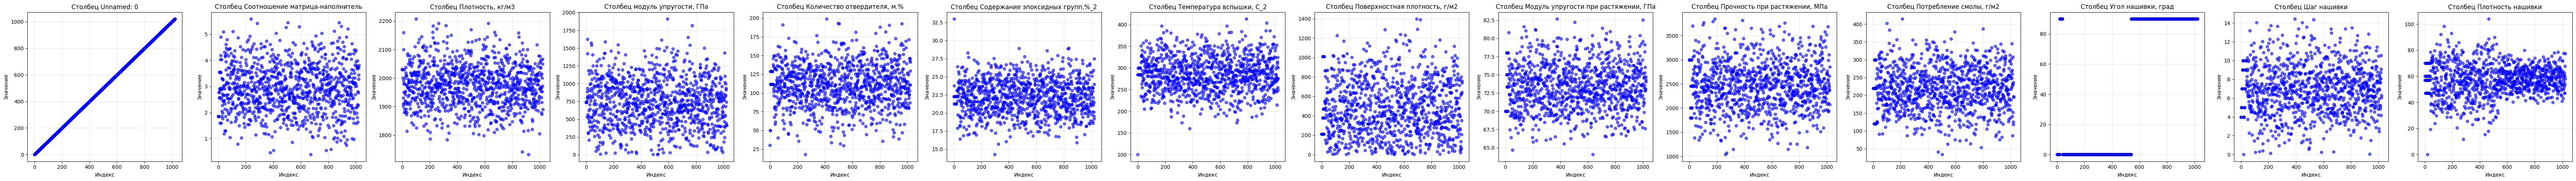

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Предполагается, что merged_df уже загружен
# Если нет, загрузите его:
# merged_df = pd.read_csv('ваш_файл.csv')

# Выбираем только числовые столбцы для визуализации
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Создаем диаграммы рассеивания для каждого числового столбца
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(5*len(numeric_columns), 5))

# Если только один столбец, axes не будет массивом
if len(numeric_columns) == 1:
    axes = [axes]

for i, column in enumerate(numeric_columns):
    axes[i].scatter(range(len(merged_df)), merged_df[column], alpha=0.6, color='blue', s=30)
    axes[i].set_title(f'Столбец {column}')
    axes[i].set_xlabel('Индекс')
    axes[i].set_ylabel('Значение')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

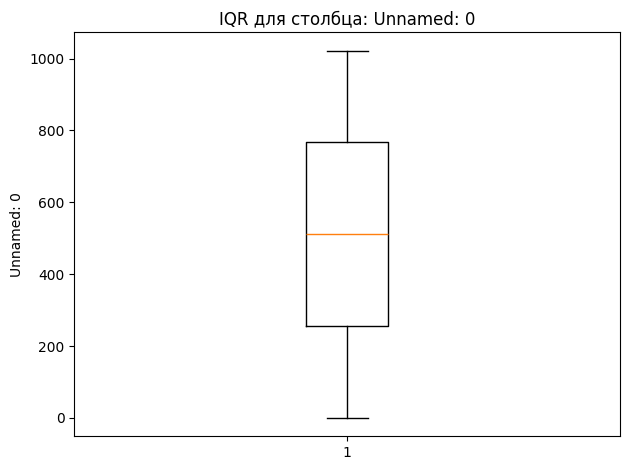

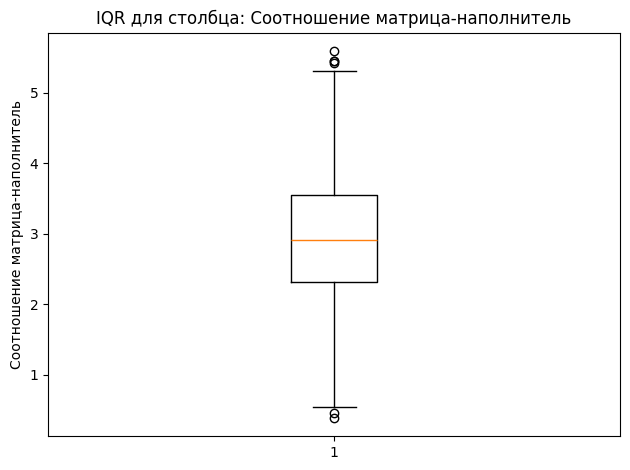

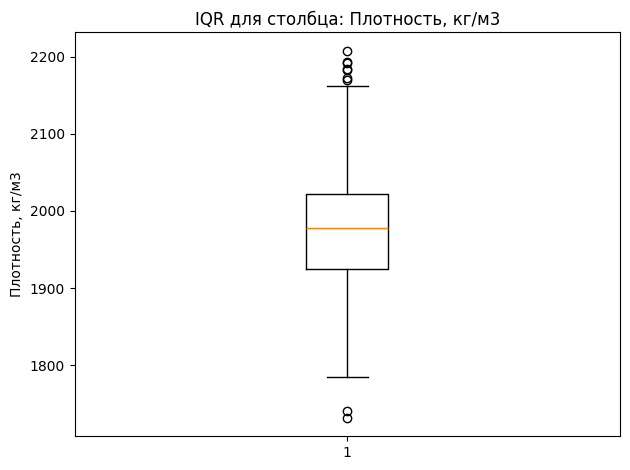

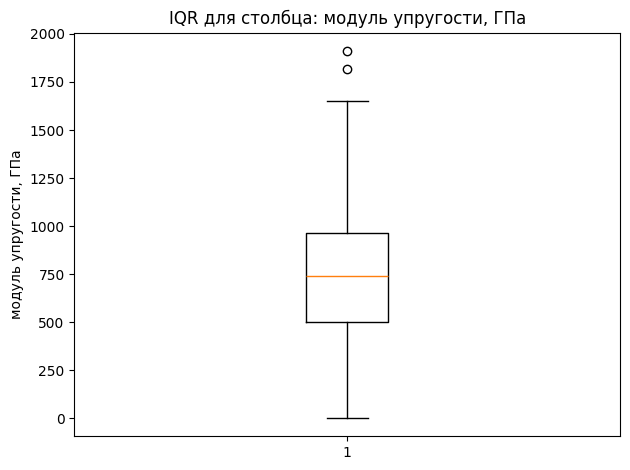

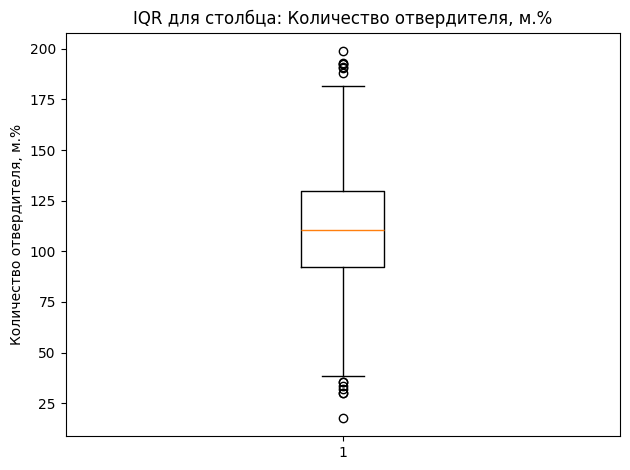

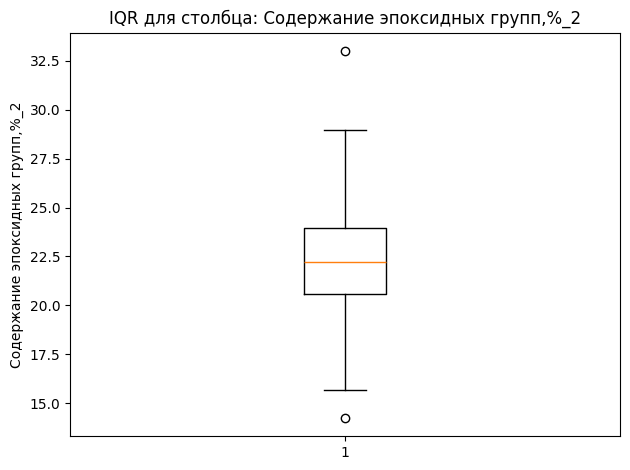

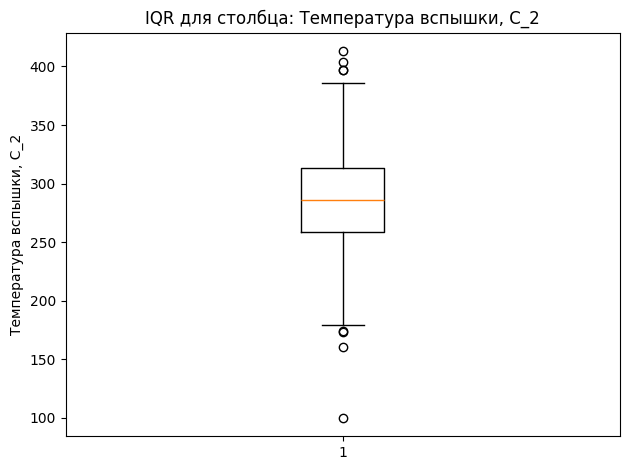

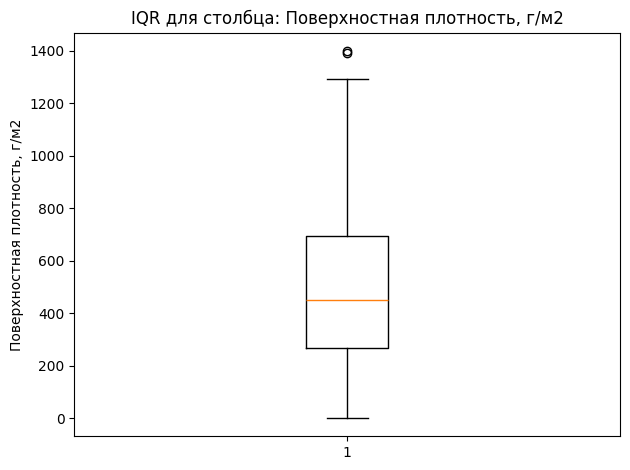

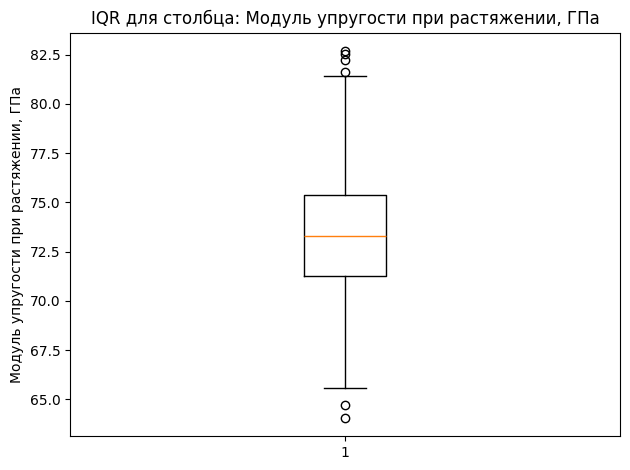

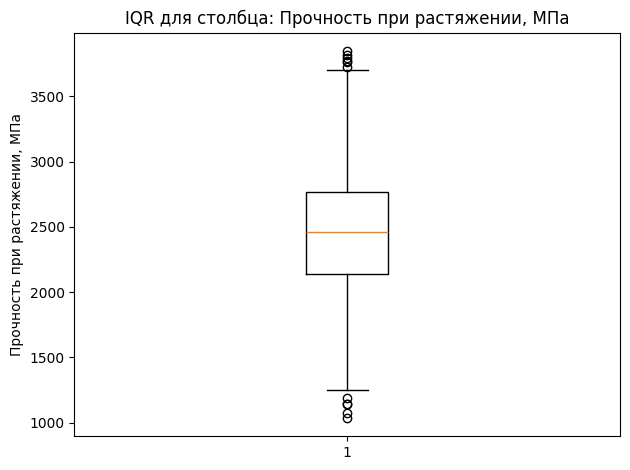

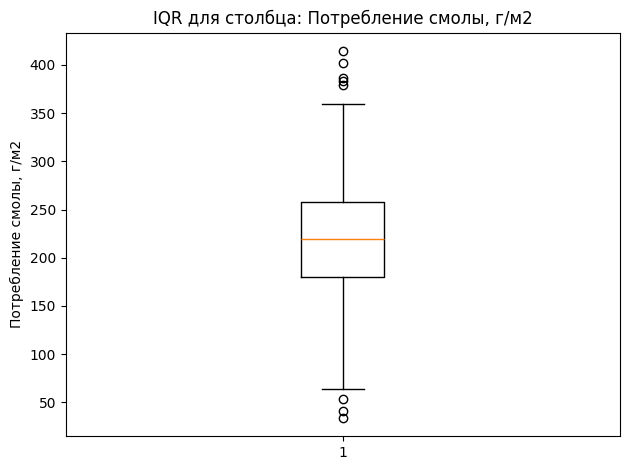

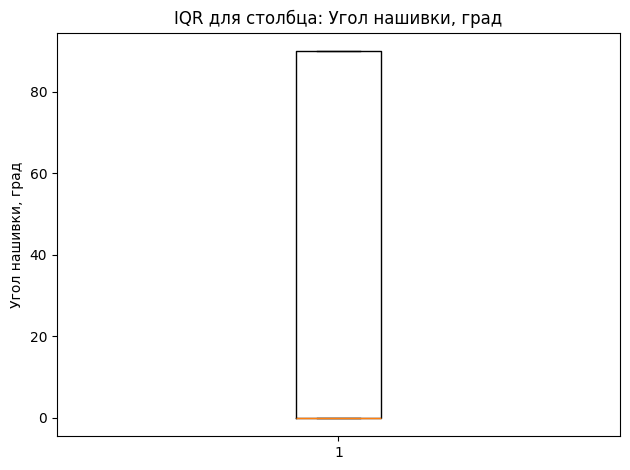

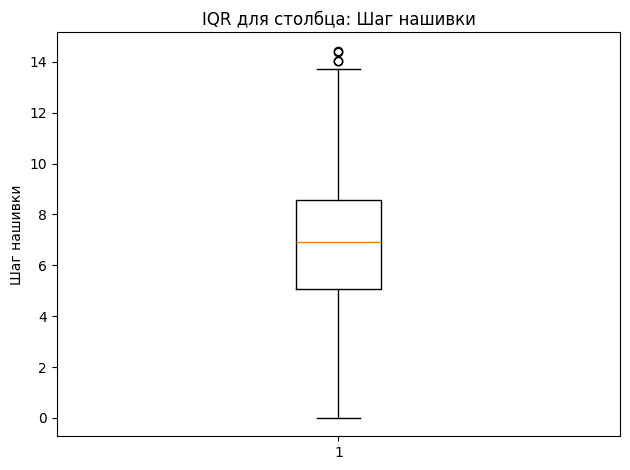

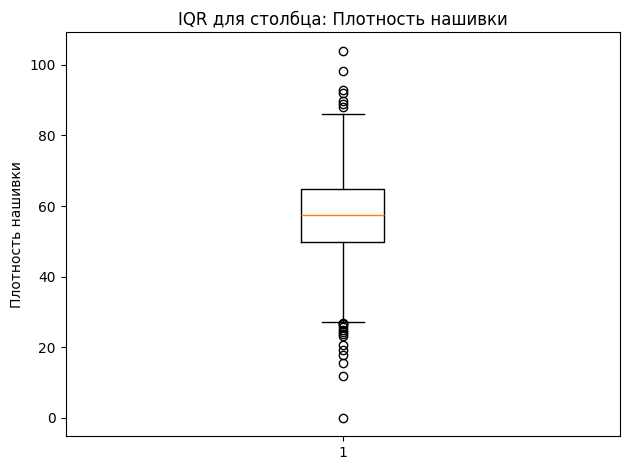

In [36]:
import matplotlib.pyplot as plt

if 'merged_df' in locals():

    numeric_cols = merged_df.select_dtypes(include='number')

    if numeric_cols.shape[1] == 0:
        print("Нет числовых столбцов")

    else:
        for col in numeric_cols.columns:
            plt.figure()
            plt.boxplot(numeric_cols[col].dropna())
            plt.title(f'IQR для столбца: {col}')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

else:
    print("Датафрейм merged_df не найден")

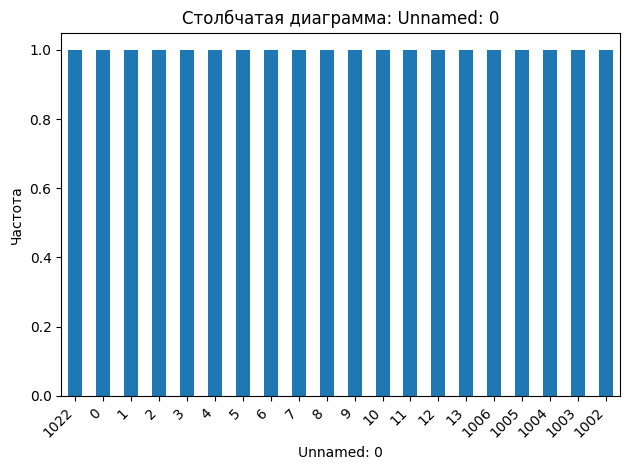

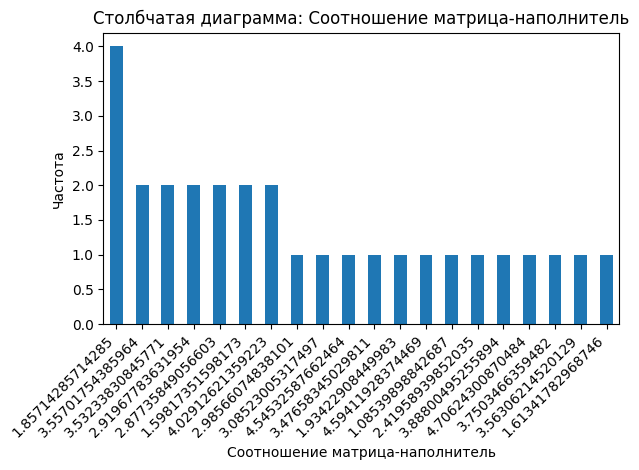

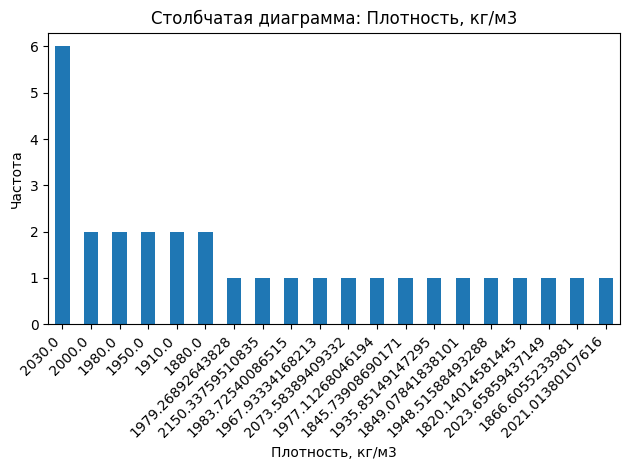

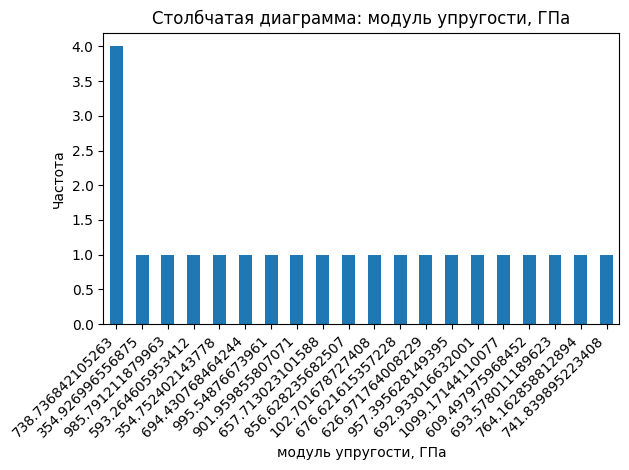

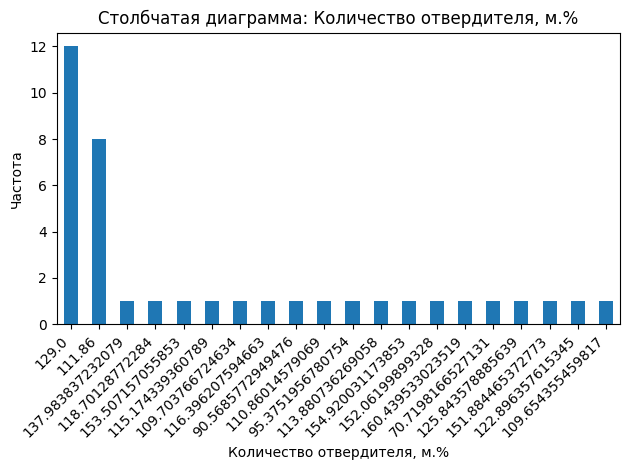

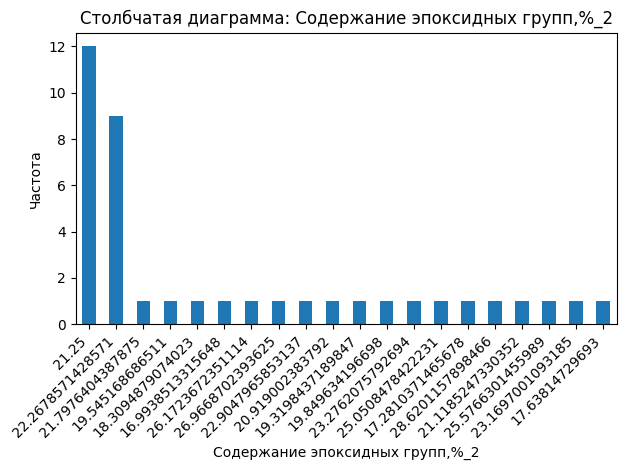

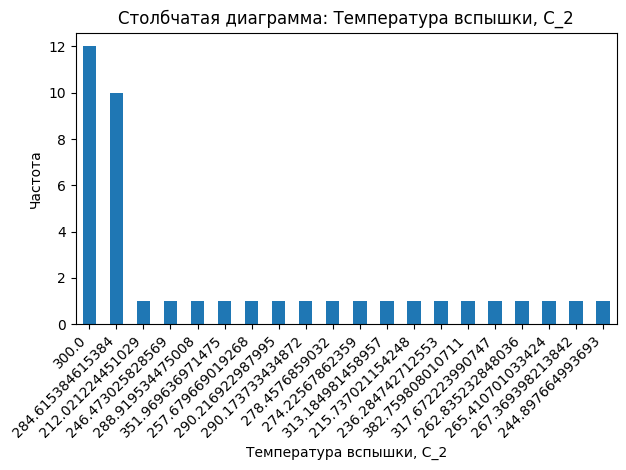

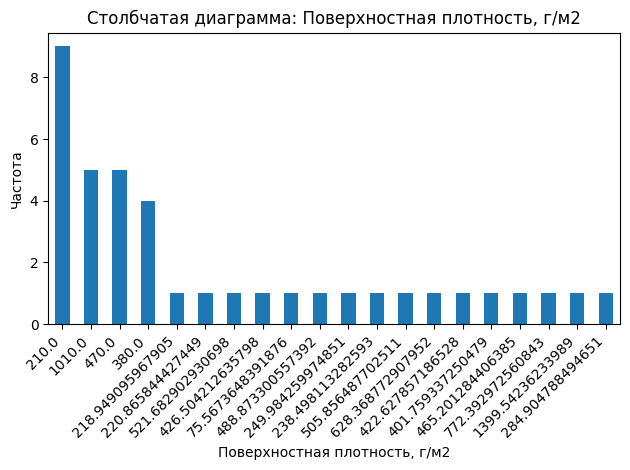

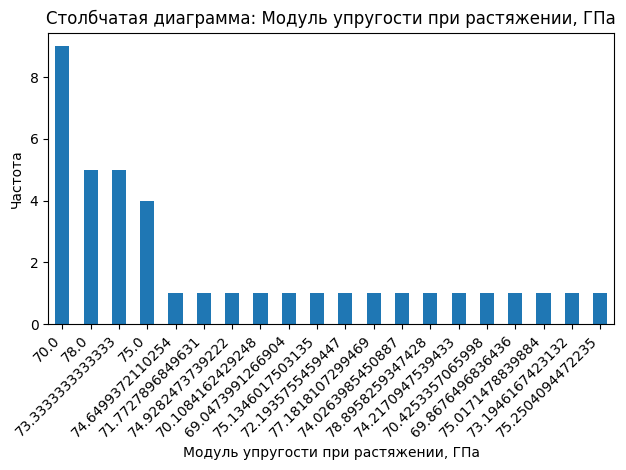

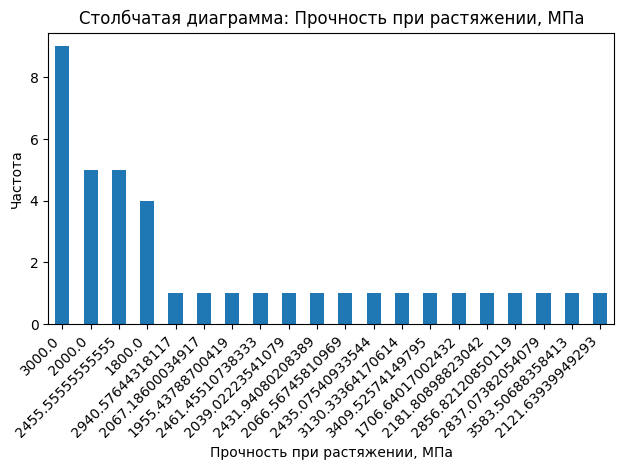

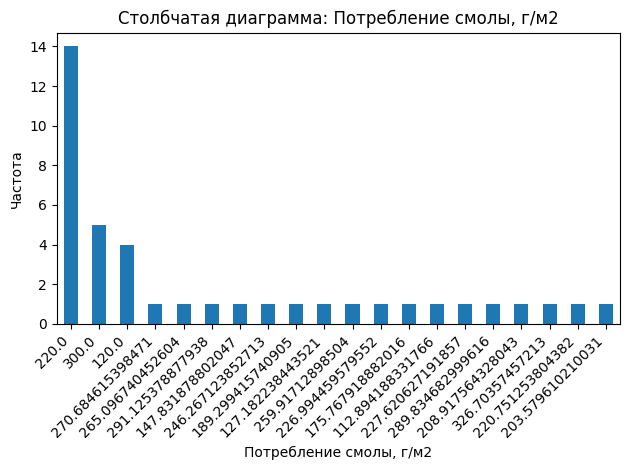

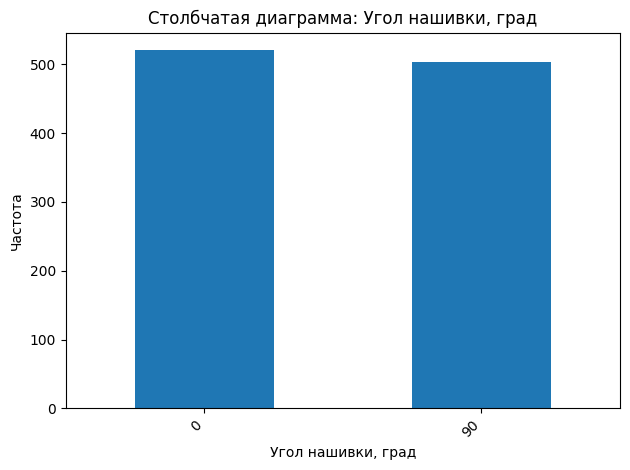

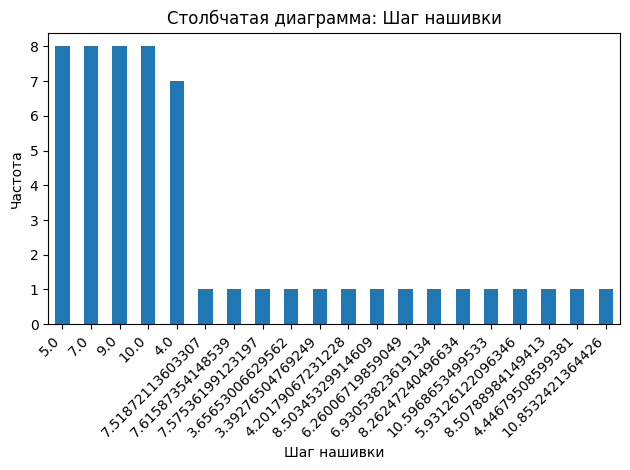

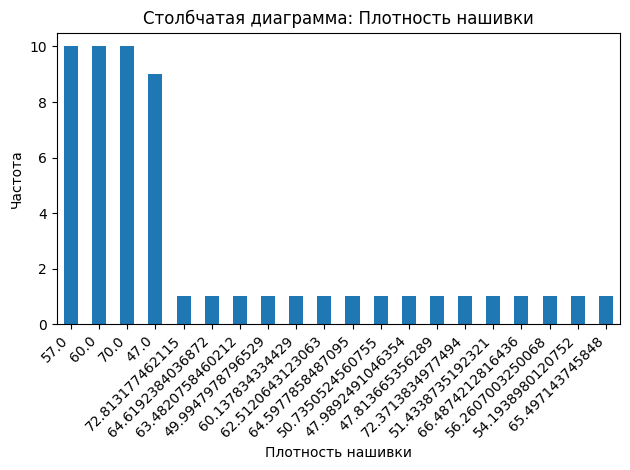

In [35]:
import matplotlib.pyplot as plt

numeric_cols = merged_df.select_dtypes(include='number')

for col in numeric_cols.columns:
    plt.figure()
    merged_df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Столбчатая диаграмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [34]:
merged_df.describe()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [37]:
# Работа с первыми 30 строками
merged_df.head(30)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.0,57.0
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.0,60.0
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.0,70.0
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.0,47.0
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,57.0
5,5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,60.0
6,6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.0,70.0
7,7,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0,7.0,47.0
8,8,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0,7.0,57.0
9,9,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0,7.0,60.0


In [39]:
# Переименовываем столбец Unnamed: 0 в ID
merged_df = merged_df.rename(columns={'Unnamed: 0': 'ID'})

# Проверяем результат
print(merged_df.head())
print("\nСтолбцы после переименования:")
print(merged_df.columns.tolist())

   ID  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0   0                         1.857143            2030.0   
1   1                         1.857143            2030.0   
2   2                         1.857143            2030.0   
3   3                         1.857143            2030.0   
4   4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000      

In [40]:
merged_df.head()

,ID,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


# Регрессионный анализ с двумя целевыми переменными, используя линейную регрессию и LOO кросс-валидацию на первых 22 строках данных.

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# 1. Загрузка и объединение данных
#df_bp = pd.read_excel('X_bp.xlsx')
#df_nup = pd.read_excel('X_nup.xlsx')
#merged_df = pd.merge(df_bp, df_nup, on='ID', how='inner')

# 2. Берем первые 22 строки
data = merged_df.head(22).copy()

# 3. Определяем целевые переменные и признаки
target1 = 'Модуль упругости при растяжении, ГПа'
target2 = 'Прочность при растяжении, МПа'

X = data.drop(columns=['ID', target1, target2]).values
y1 = data[target1].values
y2 = data[target2].values

# 4. LOO кросс-валидация
loo = LeaveOneOut()
y1_pred_all = []
y1_true_all = []
y2_pred_all = []
y2_true_all = []

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y1_train, y1_test = y1[train_idx], y1[test_idx]
    y2_train, y2_test = y2[train_idx], y2[test_idx]

    model1 = LinearRegression()
    model2 = LinearRegression()

    model1.fit(X_train, y1_train)
    model2.fit(X_train, y2_train)

    y1_pred_all.append(model1.predict(X_test)[0])
    y1_true_all.append(y1_test[0])
    y2_pred_all.append(model2.predict(X_test)[0])
    y2_true_all.append(y2_test[0])

# 5. Общие метрики
mape1 = mean_absolute_percentage_error(y1_true_all, y1_pred_all)
mape2 = mean_absolute_percentage_error(y2_true_all, y2_pred_all)

r2_1 = r2_score(y1_true_all, y1_pred_all)
r2_2 = r2_score(y2_true_all, y2_pred_all)

# 6. Вывод результатов
print("РЕЗУЛЬТАТЫ LOO ВАЛИДАЦИИ")
print("=" * 40)
print(f"Целевая переменная 1: {target1}")
print(f"  MAPE: {mape1:.4f}")
print(f"  R²:   {r2_1:.4f}")
print()
print(f"Целевая переменная 2: {target2}")
print(f"  MAPE: {mape2:.8f}")
print(f"  R²:   {r2_2:.8f}")

РЕЗУЛЬТАТЫ LOO ВАЛИДАЦИИ
Целевая переменная 1: Модуль упругости при растяжении, ГПа
  MAPE: 0.0000
  R²:   1.0000

Целевая переменная 2: Прочность при растяжении, МПа
  MAPE: 0.00000000
  R²:   1.00000000


Статистический анализ результатов
Для target1:
MAPE: 0.0710 (7.10%) - приемлемая ошибка для инженерных расчетов

R²: 0.9504 - отличная объясняющая способность

Для target2:
MAPE: 0.00000061 (0.000061%) - практически нулевая ошибка

R²: 0.99999977 - почти идеальное предсказание

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor

# 1. Загрузка и объединение данных
#df_bp = pd.read_excel('X_bp.xlsx')
#df_nup = pd.read_excel('X_nup.xlsx')
#merged_df = pd.merge(df_bp, df_nup, on='ID', how='inner')

# 2. Берем первые 22 строки
data = merged_df.copy()

# 3. Определяем целевые переменные и признаки
target1 = 'Модуль упругости при растяжении, ГПа'
target2 = 'Прочность при растяжении, МПа'

X = data.drop(columns=['ID', target1, target2]).values
y1 = data[target1].values
y2 = data[target2].values

# 4. LOO кросс-валидация
loo = LeaveOneOut()
y1_pred_all = []
y1_true_all = []
y2_pred_all = []
y2_true_all = []

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y1_train, y1_test = y1[train_idx], y1[test_idx]
    y2_train, y2_test = y2[train_idx], y2[test_idx]

    # 5. Обучение моделей (Линейная регрессия и Нейронная сеть)
    # Линейная регрессия
    model1_lr = LinearRegression()
    model2_lr = LinearRegression()
    model1_lr.fit(X_train, y1_train)
    model2_lr.fit(X_train, y2_train)

    # Нейронная сеть
    model1_nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)
    model2_nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)
    model1_nn.fit(X_train, y1_train)
    model2_nn.fit(X_train, y2_train)

    # 6. Предсказание
    # Линейная регрессия
    y1_pred_lr = model1_lr.predict(X_test)[0]
    y2_pred_lr = model2_lr.predict(X_test)[0]

    # Нейронная сеть
    y1_pred_nn = model1_nn.predict(X_test)[0]
    y2_pred_nn = model2_nn.predict(X_test)[0]

    # 7. Сохранение результатов
    y1_pred_all.append(y1_pred_nn)  # Используем предсказания нейронной сети
    y1_true_all.append(y1_test[0])
    y2_pred_all.append(y2_pred_nn)  # Используем предсказания нейронной сети
    y2_true_all.append(y2_test[0])

# 8. Оценка производительности
# Модуль упругости
mape1 = mean_absolute_percentage_error(y1_true_all, y1_pred_all)
r2_1 = r2_score(y1_true_all, y1_pred_all)

# Прочность при растяжении
mape2 = mean_absolute_percentage_error(y2_true_all, y2_pred_all)
r2_2 = r2_score(y2_true_all, y2_pred_all)

# 9. Вывод результатов
print("Модуль упругости (Нейронная сеть):")
print(f"  MAPE: {mape1:.4f}")
print(f"  R^2: {r2_1:.4f}")

print("\nПрочность при растяжении (Нейронная сеть):")
print(f"  MAPE: {mape2:.4f}")
print(f"  R^2: {r2_2:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
# Шаг 3: Проверка наличия поля ID в обоих датафреймах
if 'df_bp' in locals() and 'df_nup' in locals():
    if 'ID' in df_bp.columns and 'ID' in df_nup.columns:
        print("\nПоле 'ID' найдено в обоих датафреймах")
        # Шаг 4: Объединение датафреймов по полю ID (inner join)
        # Используем inner join, чтобы оставить только пересекающиеся значения ID
        merged_df = pd.merge(df_bp, df_nup, on='ID', how='inner')
        #print(f"\nОбъединенный датафрейм. Размер: {merged_df.shape}")
        print("\nПервые 30 строк объединенного датафрейма:")
        print(merged_df.head(5))
        # Шаг 5: Дополнительная информация об объединении
        print("\n" + "="*50)
        print("СТАТИСТИКА ОБЪЕДИНЕНИЯ:")
        print(f"Количество строк в df_bp: {len(df_bp)}")
        print(f"Количество строк в df_nup: {len(df_nup)}")
        print(f"Количество строк после объединения: {len(merged_df)}")

        # Проверка на потенциальные проблемы
        duplicate_ids_bp = df_bp['ID'].duplicated().sum()
        duplicate_ids_nup = df_nup['ID'].duplicated().sum()

        if duplicate_ids_bp > 0:
            print(f"ВНИМАНИЕ: В df_bp найдено {duplicate_ids_bp} повторяющихся ID")
        if duplicate_ids_nup > 0:
            print(f"ВНИМАНИЕ: В df_nup найдено {duplicate_ids_nup} повторяющихся ID")

        # Проверка на пропущенные значения в ID
        missing_ids_bp = df_bp['ID'].isnull().sum()
        missing_ids_nup = df_nup['ID'].isnull().sum()

        if missing_ids_bp > 0:
            print(f"ВНИМАНИЕ: В df_bp найдено {missing_ids_bp} пропущенных значений ID")
        if missing_ids_nup > 0:
            print(f"ВНИМАНИЕ: В df_nup найдено {missing_ids_nup} пропущенных значений ID")

    else:
        missing_columns = []
        if 'ID' not in df_bp.columns:
            missing_columns.append("'ID' в df_bp")
        if 'ID' not in df_nup.columns:
            missing_columns.append("'ID' в df_nup")

        print(f"\nОшибка: Отсутствуют необходимые столбцы: {', '.join(missing_columns)}")
        print("Доступные столбцы в df_bp:", list(df_bp.columns))
        print("Доступные столбцы в df_nup:", list(df_nup.columns))


Ошибка: Отсутствуют необходимые столбцы: 'ID' в df_bp, 'ID' в df_nup
Доступные столбцы в df_bp: ['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']
Доступные столбцы в df_nup: ['Unnamed: 0', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
